In [81]:
import numpy as np
import pandas as pd
import sklearn.linear_model as linear_model
import seaborn as sns
#import xgboost as xgb
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import HTML,display
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [82]:
train=pd.read_csv('D:\\data\\boston\\train.csv')
test=pd.read_csv('D:\\data\\boston\\test.csv')

In [83]:
nullValues=pd.DataFrame()
nullValues['nullValues']=train.isnull().sum()
nullValues['percentage']=0
nullValues['percentage']=nullValues.nullValues/nullValues.nullValues\
    .count()
nullValues[(nullValues.nullValues>0) & (nullValues.percentage>0.15)]\
    .sort_values(by='percentage',ascending=False).index.tolist()

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1']

In [84]:
combain=[train,test]
for dataset in combain:
    dataset=dataset.drop(['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1','Id'], axis=1, inplace=True)

In [85]:
combain=pd.concat([train,test],axis=1)
combain.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [44]:
nullValues[(nullValues.nullValues>0) & (nullValues.percentage<0.15)]\
    .sort_values(by='percentage',ascending=False)

,nullValues,percentage
MasVnrType,8,0.098765
MasVnrArea,8,0.098765
Electrical,1,0.012346


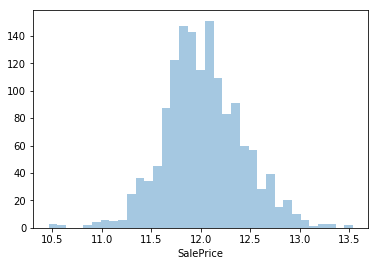

In [45]:
#sns.distplot(train['SalePrice'],kde=False,fit=stats.lognorm)
data=np.log1p(train['SalePrice'])
sns.distplot(data,kde=False)

In [46]:
print stats.skew(data)
print stats.kurtosis(data)

print stats.skew(train['SalePrice'])
print stats.kurtosis(train['SalePrice'])

0.121221913115
0.802642710747
1.88094074603
6.50981201109


In [47]:
print train.shape
print test.shape
y_train=np.log1p(train['SalePrice'])
train=train.drop('SalePrice',axis=1)
print '---------------------------'
print train.shape
print test.shape

(1460, 64)
(1459, 63)
---------------------------
(1460, 63)
(1459, 63)


In [48]:
numerical_var=[f for f in train.columns if train.dtypes[f] 
        != 'object']
catagorical_var=[f for f in train.columns if train.dtypes[f] == 'object']

In [49]:
train=train.fillna(train.mean())
test=test.dropna()

In [50]:
combain=pd.concat([train,test],axis=0)
dummified_data=pd.get_dummies(combain[catagorical_var])
combain=combain.drop(catagorical_var,axis=1)
combain=pd.concat([combain,dummified_data],axis=1)
print combain.shape
print combain.shape

(2882, 225)
(2882, 225)


In [51]:
skewed=train[numerical_var].apply(lambda x:stats.skew(x.dropna()))
skewed=skewed[skewed>0.75]
skewed=skewed.index
print np.size(list(skewed))
combain[skewed]=np.log1p(combain[skewed])

20


In [67]:
print("Find most important features relative to target")
corr = pd.concat([train,y_train],axis=1).corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.816617
GrLivArea        0.701474
GarageCars       0.679799
GarageArea       0.649994
TotalBsmtSF      0.612140
1stFlrSF         0.598305
FullBath         0.595733
YearBuilt        0.586228
YearRemodAdd     0.565263
TotRmsAbvGrd     0.536265
Fireplaces       0.491238
MasVnrArea       0.430864
BsmtFinSF1       0.369906
WoodDeckSF       0.334948
2ndFlrSF         0.321497
OpenPorchSF      0.317549
HalfBath         0.312251
LotArea          0.257729
BsmtFullBath     0.234078
BsmtUnfSF        0.223066
BedroomAbvGr     0.212029
ScreenPorch      0.122724
PoolArea         0.070293
MoSold           0.056559
3SsnPorch        0.055552
BsmtFinSF2       0.006054
BsmtHalfBath    -0.004159
MiscVal         -0.019715
OverallCond     -0.034658
YrSold          -0.035705
LowQualFinSF    -0.037575
MSSubClass      -0.072785
EnclosedPorch   -0.149533
KitchenAbvGr    -0.149544
Name: SalePrice, dtype: float64

In [74]:
X_train = combain[:1440]
X_test = combain[1441:]
y = y_train

In [75]:
def rmse_cv(model):
    rmse=np.sqrt(-(cross_val_score(model,X_train,y,scoring="neg_mean_squared_error",cv=5)))
    return rmse

In [76]:
model_ridge=Ridge()

In [77]:
alphas=[0.5,1,5,10,20,25,30,35,40,45,50,55,60,65,70,75]
ridge_cv_values=[rmse_cv(Ridge(alpha=alp)).mean() for alp in alphas]

ValueError: Found input variables with inconsistent numbers of samples: [1440, 1460]

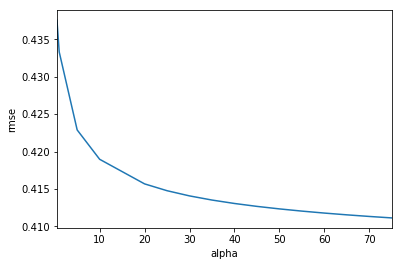

In [57]:
ridge_cv_values=pd.Series(ridge_cv_values,index=alphas)
ridge_cv_values.plot()
plt.xlabel("alpha")
plt.ylabel("rmse")